In [62]:
import os
import sys
import random
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib import rcdefaults
import matplotlib.ticker as mtick
rcdefaults() 
import seaborn as sns
from nsga2.toolbox import *

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['text.usetex'] = True

In [63]:
adult_pareto_logit = pareto_from_experiment("adult_numenc", "avg_priv_dif", "logit", "bingender", "2")
adult_pareto_tree = pareto_from_experiment("adult_numenc", "avg_priv_dif", "tree", "bingender", "2")
adult_pareto_rf = pareto_from_experiment("adult_numenc", "avg_priv_dif", "rf", "bingender", "2")

avg_adult_pareto_logit_val = compute_average_pareto(adult_pareto_logit, set="val", quartil=False)
avg_adult_pareto_tree_val = compute_average_pareto(adult_pareto_tree, set="val", quartil=False)
avg_adult_pareto_rf_val = compute_average_pareto(adult_pareto_rf, set="val", quartil=False)

avg_adult_pareto_logit_test = compute_average_pareto(adult_pareto_logit, set="test", quartil=False)
avg_adult_pareto_tree_test = compute_average_pareto(adult_pareto_tree, set="test", quartil=False)
avg_adult_pareto_rf_test = compute_average_pareto(adult_pareto_rf, set="test", quartil=False)

diabetes_pareto_logit = pareto_from_experiment("diabetes", "avg_priv_dif", "logit", "multirace", "2")
diabetes_pareto_tree = pareto_from_experiment("diabetes", "avg_priv_dif", "tree", "multirace", "2")
diabetes_pareto_rf = pareto_from_experiment("diabetes", "avg_priv_dif", "rf", "multirace", "2")

avg_diabetes_pareto_logit_val = compute_average_pareto(diabetes_pareto_logit, set="val", quartil=False)
avg_diabetes_pareto_tree_val = compute_average_pareto(diabetes_pareto_tree, set="val", quartil=False)
avg_diabetes_pareto_rf_val = compute_average_pareto(diabetes_pareto_rf, set="val", quartil=False)

avg_diabetes_pareto_logit_test = compute_average_pareto(diabetes_pareto_logit, set="test", quartil=False)
avg_diabetes_pareto_tree_test = compute_average_pareto(diabetes_pareto_tree, set="test", quartil=False)
avg_diabetes_pareto_rf_test = compute_average_pareto(diabetes_pareto_rf, set="test", quartil=False)

compas_pareto_logit = pareto_from_experiment("compas2", "avg_priv_dif", "logit", "binrace", "2")
compas_pareto_tree = pareto_from_experiment("compas2", "avg_priv_dif", "tree", "binrace", "2")
compas_pareto_rf = pareto_from_experiment("compas2", "avg_priv_dif", "rf", "binrace", "2")

avg_compas_pareto_logit_val = compute_average_pareto(compas_pareto_logit, set="val", quartil=False)
avg_compas_pareto_tree_val = compute_average_pareto(compas_pareto_tree, set="val", quartil=False)
avg_compas_pareto_rf_val = compute_average_pareto(compas_pareto_rf, set="val", quartil=False)

avg_compas_pareto_logit_test = compute_average_pareto(compas_pareto_logit, set="test", quartil=False)
avg_compas_pareto_tree_test = compute_average_pareto(compas_pareto_tree, set="test", quartil=False)
avg_compas_pareto_rf_test = compute_average_pareto(compas_pareto_rf, set="test", quartil=False)

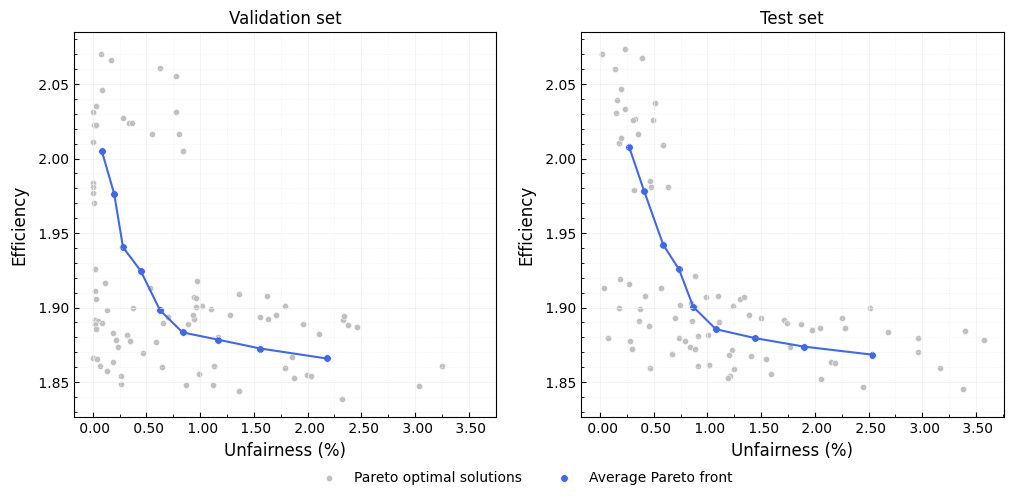

In [66]:
rcdefaults()
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

ax[0].grid(which='major', axis="both", color='#EEEEEE', linestyle='solid', linewidth=0.5)
ax[0].grid(which='minor', axis="both", color='#EEEEEE', linestyle='dotted', linewidth=0.5)
ax[0].tick_params(direction="in", which="both", axis="both", labelsize=10)

ax[0].set_title("Validation set", fontsize=12)
ax[0].set_xlabel(r"Unfairness (%)", fontsize=12)
ax[0].set_ylabel(r"Efficiency", fontsize=12)

ax[0].xaxis.set_minor_locator(plt.MultipleLocator(0.25))
ax[0].yaxis.set_minor_locator(plt.MultipleLocator(0.005))
ax[0].xaxis.set_major_formatter(ticker.FormatStrFormatter('% 1.2f'))
ax[0].yaxis.set_major_formatter(ticker.FormatStrFormatter('% 1.2f'))

sns.scatterplot(x="unfairness_val", y='set_size_val', data=adult_pareto_logit, ax=ax[0], s=20, color="silver", label="Pareto optimal solutions")
sns.lineplot(x="unfairness_val", y='set_size_val', data=avg_adult_pareto_logit_val, ax=ax[0], color="royalblue")
sns.scatterplot(x="unfairness_val", y='set_size_val', data=avg_adult_pareto_logit_val, ax=ax[0], s=30, color="royalblue", label="Average Pareto front", marker="o")
ax[0].get_legend().remove()

ax[1].grid(which='major', axis="both", color='#EEEEEE', linestyle='solid', linewidth=0.5)
ax[1].grid(which='minor', axis="both", color='#EEEEEE', linestyle='dotted', linewidth=0.5)
ax[1].tick_params(direction="in", which="both", axis="both", labelsize=10)
ax[1].yaxis.set_tick_params(labelleft=True)

ax[1].set_title("Test set", fontsize=12)
ax[1].set_xlabel(r"Unfairness (%)", fontsize=12)
ax[1].set_ylabel(r"Efficiency", fontsize=12)

ax[1].xaxis.set_minor_locator(plt.MultipleLocator(0.25))
ax[1].yaxis.set_minor_locator(plt.MultipleLocator(0.01))
ax[1].xaxis.set_major_formatter(ticker.FormatStrFormatter('% 1.2f'))
ax[1].yaxis.set_major_formatter(ticker.FormatStrFormatter('% 1.2f'))

sns.scatterplot(x="unfairness_test", y='set_size_test', data=adult_pareto_logit, ax=ax[1], s=20, color="silver", label="Pareto optimal solutions")
sns.lineplot(x="unfairness_test", y='set_size_test', data=avg_adult_pareto_logit_test, ax=ax[1], color="royalblue")
sns.scatterplot(x="unfairness_test", y='set_size_test', data=avg_adult_pareto_logit_test, ax=ax[1], s=30, color="royalblue", label="Average Pareto front", marker="o")
ax[1].get_legend().remove()
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False, prop={'size': 10})

plt.savefig("adult_average_pareto_logit.eps", format="eps", dpi=600, bbox_inches="tight")

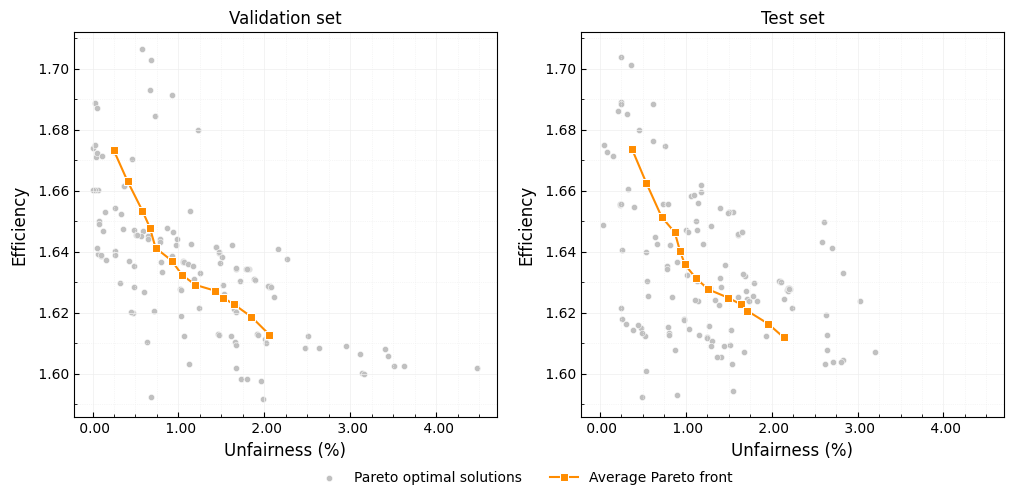

In [80]:
rcdefaults()
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

ax[0].grid(which='major', axis="both", color='#EEEEEE', linestyle='solid', linewidth=0.5)
ax[0].grid(which='minor', axis="both", color='#EEEEEE', linestyle='dotted', linewidth=0.5)
ax[0].tick_params(direction="in", which="both", axis="both", labelsize=10)

ax[0].set_title("Validation set", fontsize=12)
ax[0].set_xlabel(r"Unfairness (%)", fontsize=12)
ax[0].set_ylabel(r"Efficiency", fontsize=12)

ax[0].xaxis.set_minor_locator(plt.MultipleLocator(0.25))
ax[0].yaxis.set_minor_locator(plt.MultipleLocator(0.01))
ax[0].xaxis.set_major_formatter(ticker.FormatStrFormatter('% 1.2f'))
ax[0].yaxis.set_major_formatter(ticker.FormatStrFormatter('% 1.2f'))

sns.scatterplot(x="unfairness_val", y='set_size_val', data=adult_pareto_tree, ax=ax[0], s=20, color="silver", label="Pareto optimal solutions")
sns.lineplot(x="unfairness_val", y='set_size_val', data=avg_adult_pareto_tree_val, ax=ax[0], color="darkorange",  label="Average Pareto front", marker="s")
sns.scatterplot(x="unfairness_val", y='set_size_val', data=avg_adult_pareto_tree_val, ax=ax[0], s=30, color="darkorange")
ax[0].get_legend().remove()

ax[1].grid(which='major', axis="both", color='#EEEEEE', linestyle='solid', linewidth=0.5)
ax[1].grid(which='minor', axis="both", color='#EEEEEE', linestyle='dotted', linewidth=0.5)
ax[1].tick_params(direction="in", which="both", axis="both", labelsize=10)
ax[1].yaxis.set_tick_params(labelleft=True)

ax[1].set_title("Test set", fontsize=12)
ax[1].set_xlabel(r"Unfairness (%)", fontsize=12)
ax[1].set_ylabel(r"Efficiency", fontsize=12)

ax[1].xaxis.set_minor_locator(plt.MultipleLocator(0.25))
ax[1].yaxis.set_minor_locator(plt.MultipleLocator(0.01))
ax[1].xaxis.set_major_formatter(ticker.FormatStrFormatter('% 1.2f'))
ax[1].yaxis.set_major_formatter(ticker.FormatStrFormatter('% 1.2f'))

sns.scatterplot(x="unfairness_test", y='set_size_test', data=adult_pareto_tree, ax=ax[1], s=20, color="silver", label="Pareto optimal solutions")
sns.lineplot(x="unfairness_test", y='set_size_test', data=avg_adult_pareto_tree_test, ax=ax[1], color="darkorange", label="Average Pareto front", marker="s")
sns.scatterplot(x="unfairness_test", y='set_size_test', data=avg_adult_pareto_tree_test, ax=ax[1], s=30, color="darkorange")
ax[1].get_legend().remove()

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False, prop={'size': 10})

plt.savefig("adult_average_pareto_tree.eps", format="eps", dpi=600, bbox_inches="tight")

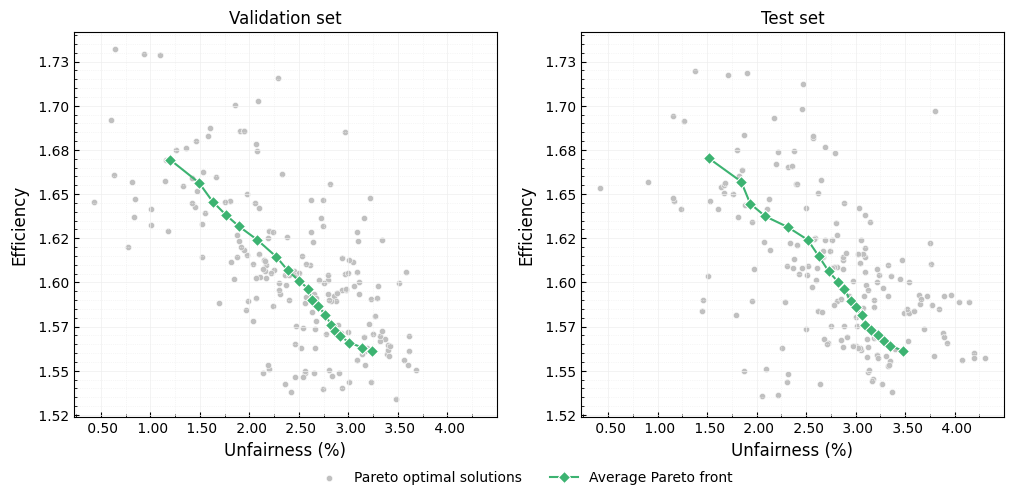

In [81]:
rcdefaults()
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

ax[0].grid(which='major', axis="both", color='#EEEEEE', linestyle='solid', linewidth=0.5)
ax[0].grid(which='minor', axis="both", color='#EEEEEE', linestyle='dotted', linewidth=0.5)
ax[0].tick_params(direction="in", which="both", axis="both", labelsize=10)

ax[0].set_title("Validation set", fontsize=12)
ax[0].set_xlabel(r"Unfairness (%)", fontsize=12)
ax[0].set_ylabel(r"Efficiency", fontsize=12)

ax[0].xaxis.set_minor_locator(plt.MultipleLocator(0.25))
ax[0].yaxis.set_minor_locator(plt.MultipleLocator(0.005))
ax[0].xaxis.set_major_formatter(ticker.FormatStrFormatter('% 1.2f'))
ax[0].yaxis.set_major_formatter(ticker.FormatStrFormatter('% 1.2f'))

sns.scatterplot(x="unfairness_val", y='set_size_val', data=adult_pareto_rf, ax=ax[0], s=20, color="silver", label="Pareto optimal solutions")
sns.lineplot(x="unfairness_val", y='set_size_val', data=avg_adult_pareto_rf_val, ax=ax[0], color="mediumseagreen", label="Average Pareto front", marker="D")
sns.scatterplot(x="unfairness_val", y='set_size_val', data=avg_adult_pareto_rf_val, ax=ax[0], s=30, color="mediumseagreen")
ax[0].get_legend().remove()

ax[1].grid(which='major', axis="both", color='#EEEEEE', linestyle='solid', linewidth=0.5)
ax[1].grid(which='minor', axis="both", color='#EEEEEE', linestyle='dotted', linewidth=0.5)
ax[1].tick_params(direction="in", which="both", axis="both", labelsize=10)
ax[1].yaxis.set_tick_params(labelleft=True)

ax[1].set_title("Test set", fontsize=12)
ax[1].set_xlabel(r"Unfairness (%)", fontsize=12)
ax[1].set_ylabel(r"Efficiency", fontsize=12)

ax[1].xaxis.set_minor_locator(plt.MultipleLocator(0.25))
ax[1].yaxis.set_minor_locator(plt.MultipleLocator(0.005))
ax[1].xaxis.set_major_formatter(ticker.FormatStrFormatter('% 1.2f'))
ax[1].yaxis.set_major_formatter(ticker.FormatStrFormatter('% 1.2f'))

sns.scatterplot(x="unfairness_test", y='set_size_test', data=adult_pareto_rf, ax=ax[1], s=20, color="silver", label="Pareto optimal solutions")
sns.lineplot(x="unfairness_test", y='set_size_test', data=avg_adult_pareto_rf_test, ax=ax[1], color="mediumseagreen", label="Average Pareto front", marker="D")
sns.scatterplot(x="unfairness_test", y='set_size_test', data=avg_adult_pareto_rf_test, ax=ax[1], s=30, color="mediumseagreen")
ax[1].get_legend().remove()

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False, prop={'size': 10})

plt.savefig("adult_average_pareto_rf.eps", format="eps", dpi=600, bbox_inches="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


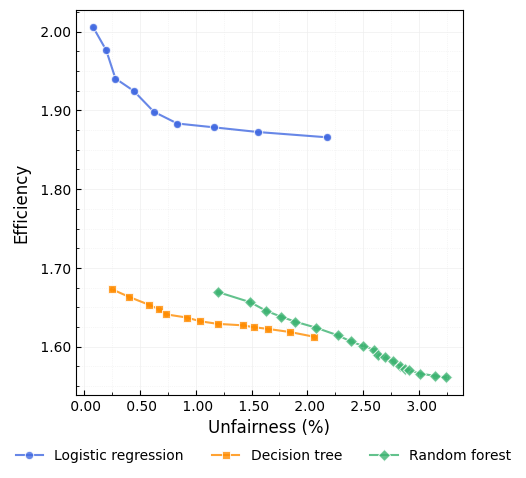

In [82]:
rcdefaults()
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.grid(which='major', axis="both", color='#EEEEEE', linestyle='solid', linewidth=0.5)
ax.grid(which='minor', axis="both", color='#EEEEEE', linestyle='dotted', linewidth=0.5)
ax.tick_params(direction="in", which="both", axis="both", labelsize=10)

ax.set_xlabel(r"Unfairness (%)", fontsize=12)
ax.set_ylabel(r"Efficiency", fontsize=12)

ax.xaxis.set_minor_locator(plt.MultipleLocator(0.25))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('% 1.2f'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('% 1.2f'))

sns.lineplot(x="unfairness_val", y='set_size_val', data=avg_adult_pareto_logit_val, ax=ax, alpha=0.8, color="royalblue", label="Logistic regression", marker="o")
sns.scatterplot(x="unfairness_val", y='set_size_val', data=avg_adult_pareto_logit_val, ax=ax, s=20, alpha=0.8, color="royalblue")
sns.lineplot(x="unfairness_val", y='set_size_val', data=avg_adult_pareto_tree_val, ax=ax, alpha=0.8, color="darkorange", label="Decision tree", marker="s")
sns.scatterplot(x="unfairness_val", y='set_size_val', data=avg_adult_pareto_tree_val, ax=ax, s=20, alpha=0.8, color="darkorange")
sns.lineplot(x="unfairness_val", y='set_size_val', data=avg_adult_pareto_rf_val, ax=ax, alpha=0.8, color="mediumseagreen", label="Random forest", marker="D")
sns.scatterplot(x="unfairness_val", y='set_size_val', data=avg_adult_pareto_rf_val, ax=ax, s=20, alpha=0.8, color="mediumseagreen")

ax.get_legend().remove()
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3, frameon=False, prop={'size': 10})

plt.savefig("adult_comparison_val.eps", format="eps", dpi=600, bbox_inches="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


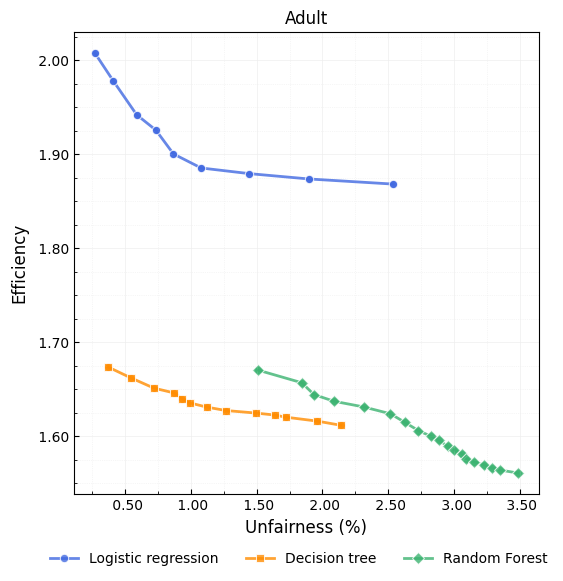

In [93]:
rcdefaults()
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.grid(which='major', axis="both", color='#EEEEEE', linestyle='solid', linewidth=0.5)
ax.grid(which='minor', axis="both", color='#EEEEEE', linestyle='dotted', linewidth=0.5)
ax.tick_params(direction="in", which="both", axis="both", labelsize=10)

ax.set_xlabel(r"Unfairness (%)", fontsize=12)
ax.set_ylabel(r"Efficiency", fontsize=12)
ax.set_title("Adult", fontsize=12)

ax.xaxis.set_minor_locator(plt.MultipleLocator(0.25))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.05))
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.25))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('% 1.2f'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('% 1.2f'))

sns.lineplot(x="unfairness_test", y='set_size_test', data=avg_adult_pareto_logit_test, ax=ax, alpha=0.8, color="royalblue", linewidth = 2, label="Logistic regression", marker="o")
sns.scatterplot(x="unfairness_test", y='set_size_test', data=avg_adult_pareto_logit_test, ax=ax, s=30, alpha=0.8, color="royalblue")
sns.lineplot(x="unfairness_test", y='set_size_test', data=avg_adult_pareto_tree_test, ax=ax, alpha=0.8, color="darkorange", linewidth = 2, label="Decision tree", marker="s")
sns.scatterplot(x="unfairness_test", y='set_size_test', data=avg_adult_pareto_tree_test, ax=ax, s=30, alpha=0.8, color="darkorange")
sns.lineplot(x="unfairness_test", y='set_size_test', data=avg_adult_pareto_rf_test, ax=ax, alpha=0.8, color="mediumseagreen", linewidth = 2, label="Random Forest", marker="D")
sns.scatterplot(x="unfairness_test", y='set_size_test', data=avg_adult_pareto_rf_test, ax=ax, s=30, alpha=0.8, color="mediumseagreen")

ax.get_legend().remove()
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.03), ncol=3, frameon=False, prop={'size': 10})

plt.savefig("adult_comparison_test.eps", format="eps", dpi=600, bbox_inches="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


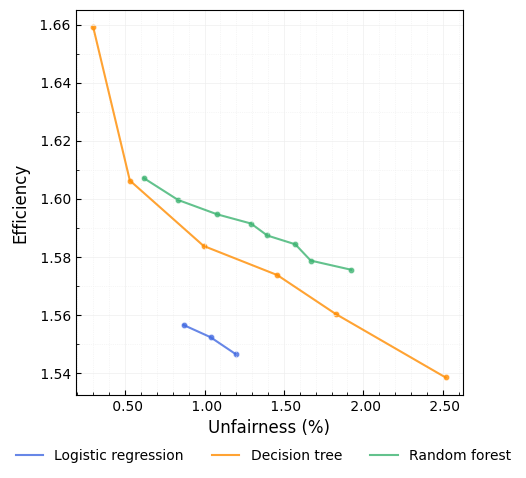

In [71]:
rcdefaults()
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.grid(which='major', axis="both", color='#EEEEEE', linestyle='solid', linewidth=0.5)
ax.grid(which='minor', axis="both", color='#EEEEEE', linestyle='dotted', linewidth=0.5)
ax.tick_params(direction="in", which="both", axis="both", labelsize=10)

ax.set_xlabel(r"Unfairness (%)", fontsize=12)
ax.set_ylabel(r"Efficiency", fontsize=12)

ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.01))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('% 1.2f'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('% 1.2f'))

sns.lineplot(x="unfairness_val", y='set_size_val', data=avg_compas_pareto_logit_val, ax=ax, alpha=0.8, color="royalblue", label="Logistic regression")
sns.scatterplot(x="unfairness_val", y='set_size_val', data=avg_compas_pareto_logit_val, ax=ax, s=20, alpha=0.8, color="royalblue")
sns.lineplot(x="unfairness_val", y='set_size_val', data=avg_compas_pareto_tree_val, ax=ax, alpha=0.8, color="darkorange", label="Decision tree")
sns.scatterplot(x="unfairness_val", y='set_size_val', data=avg_compas_pareto_tree_val, ax=ax, s=20, alpha=0.8, color="darkorange")
sns.lineplot(x="unfairness_val", y='set_size_val', data=avg_compas_pareto_rf_val, ax=ax, alpha=0.8, color="mediumseagreen", label="Random forest")
sns.scatterplot(x="unfairness_val", y='set_size_val', data=avg_compas_pareto_rf_val, ax=ax, s=20, alpha=0.8, color="mediumseagreen")

ax.get_legend().remove()
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3, frameon=False, prop={'size': 10})

plt.savefig("compas_comparison_val.eps", format="eps", dpi=600, bbox_inches="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


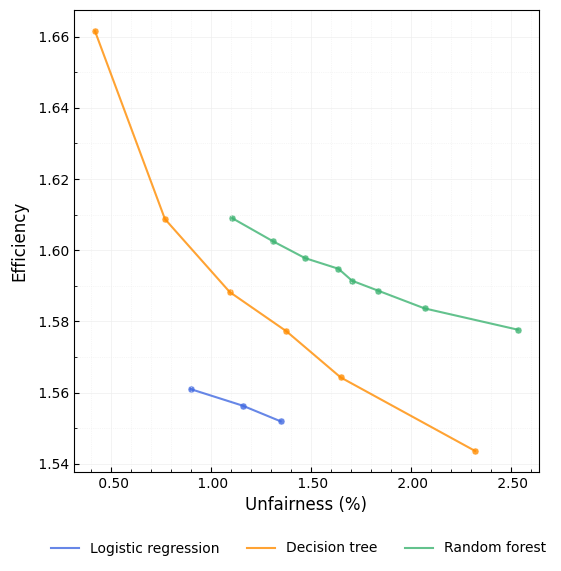

In [72]:
rcdefaults()
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.grid(which='major', axis="both", color='#EEEEEE', linestyle='solid', linewidth=0.5)
ax.grid(which='minor', axis="both", color='#EEEEEE', linestyle='dotted', linewidth=0.5)
ax.tick_params(direction="in", which="both", axis="both", labelsize=10)

ax.set_xlabel(r"Unfairness (%)", fontsize=12)
ax.set_ylabel(r"Efficiency", fontsize=12)

ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.01))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('% 1.2f'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('% 1.2f'))

sns.lineplot(x="unfairness_test", y='set_size_test', data=avg_compas_pareto_logit_test, ax=ax, alpha=0.8, color="royalblue", label="Logistic regression")
sns.scatterplot(x="unfairness_test", y='set_size_test', data=avg_compas_pareto_logit_test, ax=ax, s=25, alpha=0.8, color="royalblue")
sns.lineplot(x="unfairness_test", y='set_size_test', data=avg_compas_pareto_tree_test, ax=ax, alpha=0.8, color="darkorange", label="Decision tree")
sns.scatterplot(x="unfairness_test", y='set_size_test', data=avg_compas_pareto_tree_test, ax=ax, s=25, alpha=0.8, color="darkorange")
sns.lineplot(x="unfairness_test", y='set_size_test', data=avg_compas_pareto_rf_test, ax=ax, alpha=0.8, color="mediumseagreen", label="Random forest")
sns.scatterplot(x="unfairness_test", y='set_size_test', data=avg_compas_pareto_rf_test, ax=ax, s=25, alpha=0.8, color="mediumseagreen")

ax.get_legend().remove()
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3, frameon=False, prop={'size': 10})

plt.savefig("compas_comparison_test.eps", format="eps", dpi=600, bbox_inches="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


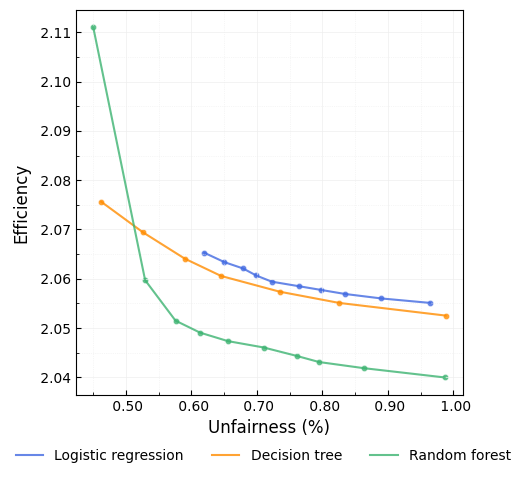

In [73]:
rcdefaults()
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.grid(which='major', axis="both", color='#EEEEEE', linestyle='solid', linewidth=0.5)
ax.grid(which='minor', axis="both", color='#EEEEEE', linestyle='dotted', linewidth=0.5)
ax.tick_params(direction="in", which="both", axis="both", labelsize=10)

ax.set_xlabel(r"Unfairness (%)", fontsize=12)
ax.set_ylabel(r"Efficiency", fontsize=12)

ax.xaxis.set_minor_locator(plt.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.005))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('% 1.2f'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('% 1.2f'))

sns.lineplot(x="unfairness_val", y='set_size_val', data=avg_diabetes_pareto_logit_val, ax=ax, alpha=0.8, color="royalblue", label="Logistic regression")
sns.scatterplot(x="unfairness_val", y='set_size_val', data=avg_diabetes_pareto_logit_val, ax=ax, s=20, alpha=0.8, color="royalblue")
sns.lineplot(x="unfairness_val", y='set_size_val', data=avg_diabetes_pareto_tree_val, ax=ax, alpha=0.8, color="darkorange", label="Decision tree")
sns.scatterplot(x="unfairness_val", y='set_size_val', data=avg_diabetes_pareto_tree_val, ax=ax, s=20, alpha=0.8, color="darkorange")
sns.lineplot(x="unfairness_val", y='set_size_val', data=avg_diabetes_pareto_rf_val, ax=ax, alpha=0.8, color="mediumseagreen", label="Random forest")
sns.scatterplot(x="unfairness_val", y='set_size_val', data=avg_diabetes_pareto_rf_val, ax=ax, s=20, alpha=0.8, color="mediumseagreen")

ax.get_legend().remove()
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3, frameon=False, prop={'size': 10})

plt.savefig("diabetes_comparison_val.eps", format="eps", dpi=600, bbox_inches="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


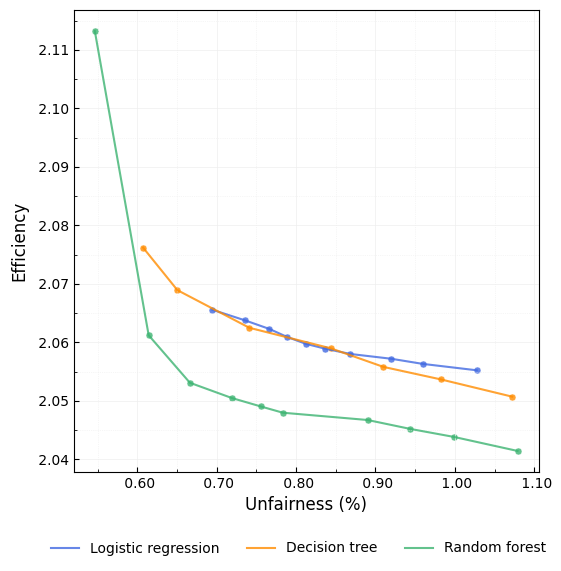

In [74]:
rcdefaults()
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.grid(which='major', axis="both", color='#EEEEEE', linestyle='solid', linewidth=0.5)
ax.grid(which='minor', axis="both", color='#EEEEEE', linestyle='dotted', linewidth=0.5)
ax.tick_params(direction="in", which="both", axis="both", labelsize=10)

ax.set_xlabel(r"Unfairness (%)", fontsize=12)
ax.set_ylabel(r"Efficiency", fontsize=12)

ax.xaxis.set_minor_locator(plt.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.005))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('% 1.2f'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('% 1.2f'))

sns.lineplot(x="unfairness_test", y='set_size_test', data=avg_diabetes_pareto_logit_test, ax=ax, alpha=0.8, color="royalblue", label="Logistic regression")
sns.scatterplot(x="unfairness_test", y='set_size_test', data=avg_diabetes_pareto_logit_test, ax=ax, s=25, alpha=0.8, color="royalblue")
sns.lineplot(x="unfairness_test", y='set_size_test', data=avg_diabetes_pareto_tree_test, ax=ax, alpha=0.8, color="darkorange", label="Decision tree")
sns.scatterplot(x="unfairness_test", y='set_size_test', data=avg_diabetes_pareto_tree_test, ax=ax, s=25, alpha=0.8, color="darkorange")
sns.lineplot(x="unfairness_test", y='set_size_test', data=avg_diabetes_pareto_rf_test, ax=ax, alpha=0.8, color="mediumseagreen", label="Random forest")
sns.scatterplot(x="unfairness_test", y='set_size_test', data=avg_diabetes_pareto_rf_test, ax=ax, s=25, alpha=0.8, color="mediumseagreen")

ax.get_legend().remove()
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3, frameon=False, prop={'size': 10})

plt.savefig("diabetes_comparison_test.eps", format="eps", dpi=600, bbox_inches="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


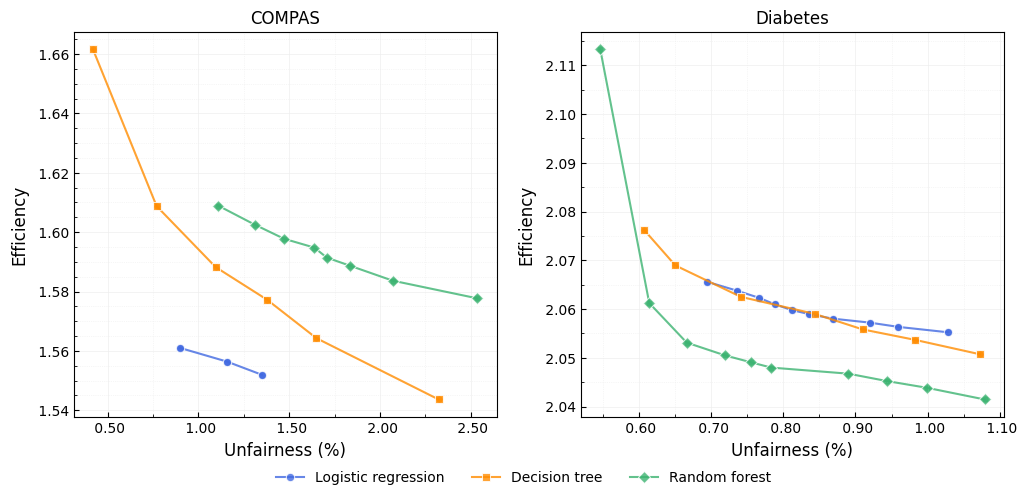

In [89]:
rcdefaults()
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].grid(which='major', axis="both", color='#EEEEEE', linestyle='solid', linewidth=0.5)
ax[0].grid(which='minor', axis="both", color='#EEEEEE', linestyle='dotted', linewidth=0.5)
ax[0].tick_params(direction="in", which="both", axis="both", labelsize=10)

ax[0].set_xlabel(r"Unfairness (%)", fontsize=12)
ax[0].set_ylabel(r"Efficiency", fontsize=12)
ax[0].set_title("COMPAS", fontsize=12)

ax[0].xaxis.set_minor_locator(plt.MultipleLocator(0.25))
ax[0].yaxis.set_minor_locator(plt.MultipleLocator(0.005))
ax[0].xaxis.set_major_formatter(ticker.FormatStrFormatter('% 1.2f'))
ax[0].yaxis.set_major_formatter(ticker.FormatStrFormatter('% 1.2f'))

sns.lineplot(x="unfairness_test", y='set_size_test', data=avg_compas_pareto_logit_test, ax=ax[0], alpha=0.8, color="royalblue", label="Logistic regression", marker="o")
sns.scatterplot(x="unfairness_test", y='set_size_test', data=avg_compas_pareto_logit_test, ax=ax[0], s=25, alpha=0.8, color="royalblue")
sns.lineplot(x="unfairness_test", y='set_size_test', data=avg_compas_pareto_tree_test, ax=ax[0], alpha=0.8, color="darkorange", label="Decision tree", marker="s")
sns.scatterplot(x="unfairness_test", y='set_size_test', data=avg_compas_pareto_tree_test, ax=ax[0], s=25, alpha=0.8, color="darkorange")
sns.lineplot(x="unfairness_test", y='set_size_test', data=avg_compas_pareto_rf_test, ax=ax[0], alpha=0.8, color="mediumseagreen", label="Random forest", marker="D")
sns.scatterplot(x="unfairness_test", y='set_size_test', data=avg_compas_pareto_rf_test, ax=ax[0], s=25, alpha=0.8, color="mediumseagreen")
ax[0].get_legend().remove()

ax[1].grid(which='major', axis="both", color='#EEEEEE', linestyle='solid', linewidth=0.5)
ax[1].grid(which='minor', axis="both", color='#EEEEEE', linestyle='dotted', linewidth=0.5)
ax[1].tick_params(direction="in", which="both", axis="both", labelsize=10)
ax[1].yaxis.set_tick_params(labelleft=True)

ax[1].set_title("Diabetes", fontsize=12)
ax[1].set_xlabel(r"Unfairness (%)", fontsize=12)
ax[1].set_ylabel(r"Efficiency", fontsize=12)

ax[1].xaxis.set_minor_locator(plt.MultipleLocator(0.05))
ax[1].yaxis.set_minor_locator(plt.MultipleLocator(0.005))
ax[1].xaxis.set_major_formatter(ticker.FormatStrFormatter('% 1.2f'))
ax[1].yaxis.set_major_formatter(ticker.FormatStrFormatter('% 1.2f'))

sns.lineplot(x="unfairness_test", y='set_size_test', data=avg_diabetes_pareto_logit_test, ax=ax[1], alpha=0.8, color="royalblue", label="Logistic regression", marker="o")
sns.scatterplot(x="unfairness_test", y='set_size_test', data=avg_diabetes_pareto_logit_test, ax=ax[1], s=25, alpha=0.8, color="royalblue")
sns.lineplot(x="unfairness_test", y='set_size_test', data=avg_diabetes_pareto_tree_test, ax=ax[1], alpha=0.8, color="darkorange", label="Decision tree", marker="s")
sns.scatterplot(x="unfairness_test", y='set_size_test', data=avg_diabetes_pareto_tree_test, ax=ax[1], s=25, alpha=0.8, color="darkorange")
sns.lineplot(x="unfairness_test", y='set_size_test', data=avg_diabetes_pareto_rf_test, ax=ax[1], alpha=0.8, color="mediumseagreen", label="Random forest", marker="D")
sns.scatterplot(x="unfairness_test", y='set_size_test', data=avg_diabetes_pareto_rf_test, ax=ax[1], s=25, alpha=0.8, color="mediumseagreen")
ax[1].get_legend().remove()

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3, frameon=False, prop={'size': 10})

plt.savefig("compas_diabetes_comparison_test.eps", format="eps", dpi=600, bbox_inches="tight")